In [1]:
import os
import dill
import quandl
import pandas as pd
import numpy as np
from scipy.ndimage.interpolation import shift
import sklearn.linear_model

In [2]:
# %matplotlib inline
import matplotlib
import seaborn as sns

In [3]:
!pwd

/Users/A.IVA/Documents/jupyter_notebooks/rest/coursera_and_blogs/time_series/notebooks


In [4]:
os.chdir('..')

##### Get data

In [5]:
data_dir = os.path.join('data', 'tdi_data')

# quandl.ApiConfig.api_key = os.environ.get('ENV_QUANDL_API_KEY')
# data = quandl.get('OPEC/ORB', start_date='1986-06-06', end_date='2019-06-06')
# data.to_csv(os.path.join(data_dir, 'qunadl__OPEC_ORB.csv'))

oil = pd.read_csv(filepath_or_buffer=os.path.join(data_dir, 'quandl_DOE_RWTC.csv'), 
                  index_col=0,
                  parse_dates=True,
                  date_parser=lambda u: pd.datetime.strptime(u, "%Y-%m-%d"))

In [6]:
temps = pd.read_csv(filepath_or_buffer=os.path.join(data_dir, 'temperatures.csv'), 
                    index_col=0,
                    names=["Temperature"],
                    parse_dates=True,
                    date_parser=lambda u: pd.datetime.strptime(u, "%Y-%m-%d %H:%M:%S"))

In [7]:
print(oil.shape)
oil.head(3)

(7570, 1)


,Value
Date,
1986-01-02,25.56
1986-01-03,26.00
1986-01-06,26.53


(<matplotlib.axes._subplots.AxesSubplot at 0x12b460a58>,
 <matplotlib.axes._subplots.AxesSubplot at 0x12c909710>)

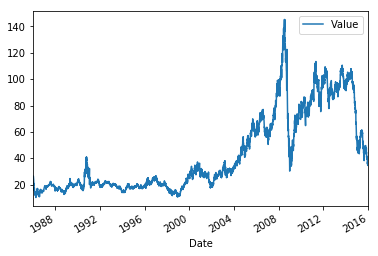

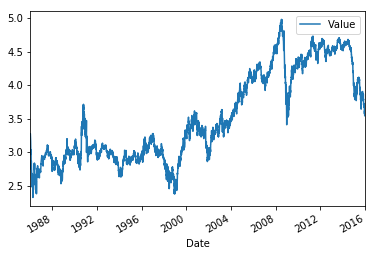

In [126]:
oil.plot(), np.log(oil).plot()

##### Get trend  (oil)

In [8]:
oil['Julian'] = oil.index.to_julian_date()
oil.head(3)

,Value,Julian
Date,,
1986-01-02,25.56,2446432.5
1986-01-03,26.00,2446433.5
1986-01-06,26.53,2446436.5


In [20]:
exp_model_df = oil.copy(deep=True)

# I have to rescale all values first.
exponential_model = sklearn.linear_model.Ridge(alpha=10000000000).fit(  
    X=exp_model_df[['Julian']], y=np.log(exp_model_df['Value'])
)

exp_model_df['Exponential_Model'] = np.exp(exponential_model.predict(exp_model_df[['Julian']]))
exp_model_df['Log_Error_Exponential'] = np.log(exp_model_df['Value'] / exp_model_df['Exponential_Model'])

display(exp_model_df.head(3))
display(exp_model_df[-3:].head(3))

,Value,Julian,Exponential_Model,Log_Error_Exponential
Date,,,,
1986-01-02,25.56,2446432.5,13.787777,0.617246
1986-01-03,26.00,2446433.5,13.790039,0.634150
1986-01-06,26.53,2446436.5,13.796828,0.653837


,Value,Julian,Exponential_Model,Log_Error_Exponential
Date,,,,
2015-12-23,36.76,2457379.5,83.083847,-0.815440
2015-12-24,37.62,2457380.5,83.097479,-0.792479
2015-12-28,36.36,2457384.5,83.152032,-0.827201


In [21]:
exponential_model.coef_, exponential_model.intercept_

(array([0.00016407]), -398.7609598924953)

In [13]:
exponential_model.coef_, exponential_model.intercept_

(array([0.00018564]), -451.6539603872006)

In [11]:
display(exp_model_df.head(3))
display(exp_model_df[-3:].head(3))

,Value,Julian,Exponential_Model,Log_Error_Exponential
Date,,,,
1986-01-02,25.56,2446432.5,12.254436,0.735141
1986-01-03,26.00,2446433.5,12.256711,0.752023
1986-01-06,26.53,2446436.5,12.263539,0.771646


,Value,Julian,Exponential_Model,Log_Error_Exponential
Date,,,,
2015-12-23,36.76,2457379.5,93.513660,-0.933697
2015-12-24,37.62,2457380.5,93.531021,-0.910757
2015-12-28,36.36,2457384.5,93.600500,-0.945566


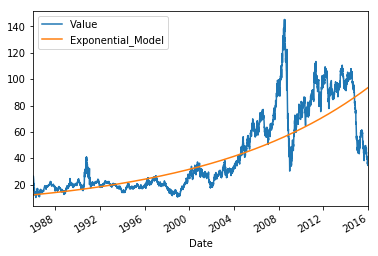

In [129]:
exp_model_df[['Value', 'Exponential_Model']].plot()

##### Look at `temperatures` data

In [139]:
print(temps.shape)
print(temps.dtypes)
temps.head(3)

(112995, 1)
Temperature    int64
dtype: object


,Temperature
2001-01-01 00:00:00,18
2001-01-01 01:00:00,18
2001-01-01 02:00:00,17


In [140]:
# look at the usual time distance between two consecutive measurements
temps['t'] = temps.index
temps['dt'] = (temps['t']-temps['t'].shift(1)).apply(lambda x: x.total_seconds())

In [141]:
(temps['dt']/3600).value_counts()

1.0     112416
2.0        461
3.0         50
5.0         24
4.0         20
6.0         11
7.0          2
11.0         2
10.0         2
8.0          2
38.0         1
23.0         1
9.0          1
50.0         1
Name: dt, dtype: int64

In [143]:
temps = temps.drop(labels=['dt','t'], axis=1)
temps = temps.asfreq('60Min', method='ffill')
print(temps.shape)
temps.head(3)

(113947, 1)


,Temperature
2001-01-01 00:00:00,18
2001-01-01 01:00:00,18
2001-01-01 02:00:00,17


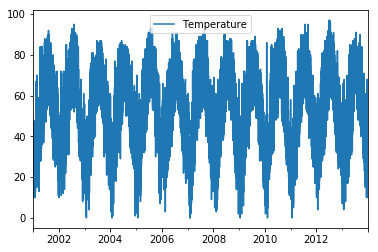

In [144]:
temps.plot()

In [155]:
alpha=1/(1+0.5)
alpha

0.6666666666666666

In [156]:
(1 + 0*(1-alpha)**1)/(1 + (1-alpha) )

0.7499999999999999

In [157]:
(2 + 1*(1-alpha)**1 + 0*(1-alpha)**2)/(1 + (1-alpha) + (1-alpha)**2)

1.6153846153846152

In [158]:
(    2*(1-alpha)**1 + 1*(1-alpha)**2 + 0*(1-alpha)**3)/( (1-alpha)**1 + (1-alpha)**2 + (1-alpha)**3 )

1.6153846153846154

In [159]:
(4                  + 2*(1-alpha)**2 + 1*(1-alpha)**3 + 0*(1-alpha)**4) / (1 + (1-alpha)**2 + (1-alpha)**3 + (1-alpha)**4)

3.670212765957447

In [149]:
df = pd.DataFrame({'B': [0, 1, 2, np.nan, 4]})

In [150]:
df.ewm(com=0.5).mean()

,B
0,0.000000
1,0.750000
2,1.615385
3,1.615385
4,3.670213


In [151]:
df.ewm(com=0.5)

EWM [com=0.5,min_periods=0,adjust=True,ignore_na=False,axis=0]

In [160]:
tmp = df.ewm(com=0.5)

In [163]:
type(tmp)

pandas.core.window.EWM

In [168]:
s = pd.Series([5, 5, 6, 7, 5, 5, 5])
s.ewm(3).var()

0         NaN
1    0.000000
2    0.378378
3    1.001081
4    0.925070
5    0.743474
6    0.573234
dtype: float64

In [171]:
s.ewm(3).var(bias=False)

0         NaN
1    0.000000
2    0.378378
3    1.001081
4    0.925070
5    0.743474
6    0.573234
dtype: float64

In [170]:
s.rolling(3).var()

0         NaN
1         NaN
2    0.333333
3    1.000000
4    1.000000
5    1.333333
6    0.000000
dtype: float64